#### [Chapter 17](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_17.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_17.ipynb) -->

**Frequency-Current Curves**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

In [5]:
import os
import warnings
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.HH_Base import HH_F_I_CURVE

warnings.filterwarnings("ignore")

if not os.path.exists('output'):
    os.makedirs('output')

In [11]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.figsize'] = [7, 5]

#### HH neuron

In [13]:
obj = HH_F_I_CURVE({'t_end':3000, 'dt':0.05})
obj()

F-I Curve Hudgkin Huxley Model


{'c': 1.0,
 'g_k': 36.0,
 'g_na': 120.0,
 'g_l': 0.3,
 'v_k': -82.0,
 'v_na': 45.0,
 'v_l': -59.0,
 'v_thr': -20.0,
 'i_ext': 7.0,
 't_end': 3000,
 'v0': -70.0,
 'dt': 0.05}

In [14]:
vec_i_ext = np.linspace(3, 13, 23)
data = obj.simulate_F_I(vec_i_ext)

I =     3.000, f =      0.00
I =     3.455, f =      0.00
I =     3.909, f =      0.00
I =     4.364, f =      0.00
I =     4.818, f =      0.00
I =     5.273, f =      0.00
I =     5.727, f =      0.00
I =     6.182, f =      0.00
I =     6.636, f =      0.00
I =     7.091, f =      0.00
I =     7.545, f =      0.00
I =     8.000, f =      0.00
I =     8.455, f =      0.00
I =     8.909, f =      0.00
I =     9.364, f =      0.00


In [ ]:
np.savez("output/data_HH.npz",
         forward=data['forward'],
         backward=data['backward'],
         i_ext=data['i_ext'])
data = np.load("output/data_HH.npz")

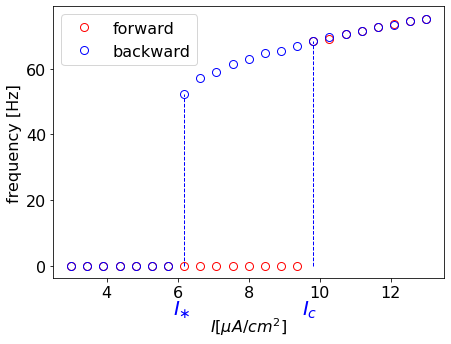

In [ ]:
obj.plot_F_I(data);

#### LIF neuron

(0.0, 150.0)

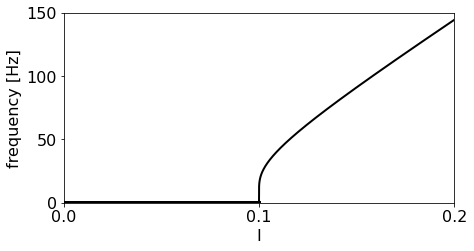

In [39]:
N = 1000
tau_m = 10.0
x = np.arange(0, 1, 0.001)

N = 1000
ind = np.arange(0, N, 1.)
I = 0.1+np.exp(-N/ind)*np.exp(1)*0.1

T = tau_m * np.log(tau_m * I / (tau_m * I - 1))
freq = 1000.0 / T

plt.figure(figsize=(7, 3.5))
plt.plot(I, freq, 'k', lw=2)
plt.plot([0, 0.1], [0, 0], 'k', lw=4)
plt.xlabel('I')
plt.ylabel('frequency [Hz]')
plt.xticks([0, 0.1, 0.2])
plt.xlim(0,0.2)
plt.ylim(0, 150)


#### Theta neuron

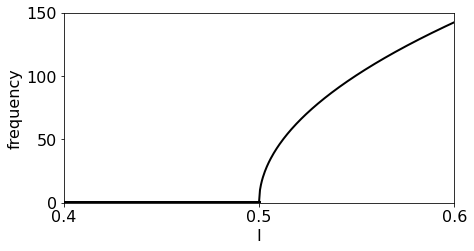

In [40]:
I = 0.5 + np.linspace(0, 0.1, 200)
f = 1000.0 * np.sqrt(2*I -1) / np.pi

plt.figure(figsize=(7, 3.5))
plt.plot(I, f, 'k', lw=2)
plt.plot([0.4,0.5], [0,0], 'k', lw=4)
plt.xlabel('I')
plt.ylabel('frequency')
plt.xlim(0.4, 0.6)
plt.ylim(0, 150)
plt.tick_params(labelsize=16)
plt.xticks([0.4, 0.5, 0.6]);


#### RTM neuron

In [1]:
# %load_ext autoreload
# %autoreload 2
# import numpy as np 
# import matplotlib.pyplot as plt
from mndynamics.models.py.RTM_Base import RTM_F_I_CURVE

In [2]:
obj = RTM_F_I_CURVE({'t_end':5000, 'dt':0.05})
obj()

F-I Curve RTM Model
Reduced Traub-Miles Model of a Pyramidal Neuron in Rat Hippocampus


{'c': 1.0,
 'g_k': 80.0,
 'g_na': 100.0,
 'g_l': 0.1,
 'v_k': -100.0,
 'v_na': 50.0,
 'v_l': -67.0,
 'v_thr': -20.0,
 'i_ext': 1.5,
 't_end': 5000,
 'v0': -70.0,
 'dt': 0.05}

In [3]:
vec_i_ext = np.linspace(0, 1.0, 30)
data = obj.simulate_F_I(vec_i_ext)

backward: 100%|██████████| 30/30 [01:23<00:00,  2.79s/it]


In [12]:
np.savez("output/data_RTM.npz",
         forward=data['forward'],
         backward=data['backward'],
         i_ext=data['i_ext'])
data = np.load("output/data_RTM.npz")

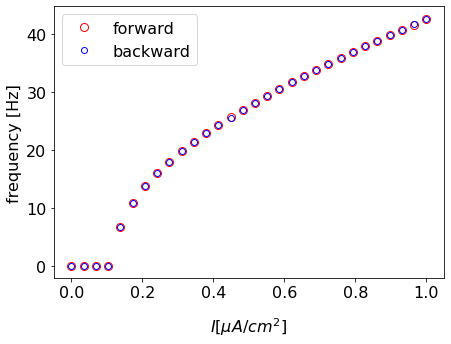

In [13]:
obj.plot_F_I(data);

#### RTM_F_I_CURVE_AT_ONSET

backward: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


1.0


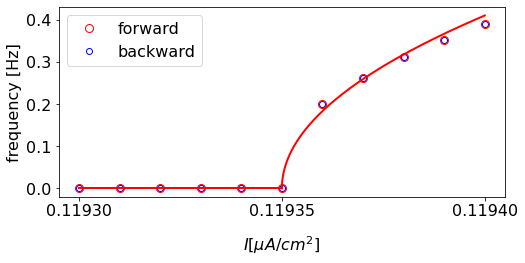

In [40]:
obj = RTM_F_I_CURVE({'t_end':20000, 'dt':0.05})

i_ext_h = 0.1194
i_ext_l = 0.1193
vec_i_ext = np.linspace(i_ext_l, i_ext_h, 11)
data = obj.simulate_F_I(vec_i_ext)

np.savez("output/data_RTM_ONSET.npz",
         forward=data['forward'],
         backward=data['backward'],
         i_ext=data['i_ext'])
data = np.load("output/data_RTM_ONSET.npz")


fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax = obj.plot_F_I(data, ax=ax)
ax.set_xticks([0.11930, 0.11935, 0.11940]);

I = data['i_ext']
ff = data['forward']
ind = np.where(ff > 0)[0]
I0 = I[ind]
f0 = ff[ind]
alpha_vec = np.linspace(0,1,101)

I_c_low = I[np.min(ind)-1]
I_c_high = I[np.min(ind)]

C_vec = np.zeros_like(alpha_vec)
err_vec = np.zeros_like(alpha_vec)

for ijk in range(len(alpha_vec)):
    alpha = alpha_vec[ijk]
    I_c = alpha*I_c_low + (1-alpha)*I_c_high
    y = f0 / np.sqrt(I0 - I_c)
    # measure how constant
    # f/sqrt(I-I_c) is, with
    # the I_c defined above.
    err_vec[ijk] = (np.max(y) - np.min(y)) / np.mean(y)
    C_vec[ijk] = np.mean(y)

# % pick the I_c that makes
# f/sqrt(I-I_c) as constant
# as possible. If there are
# several, pick the smallest.
ind = np.nanargmin(err_vec)
alpha = alpha_vec[ind]
print(alpha)

I_c = I_c_low * alpha + I_c_high * (1 - alpha)
C = C_vec[ind]
I = I_c + np.linspace(0, 1.0, 1001) * (i_ext_h - I_c)
plt.plot(I, C * np.sqrt(I - I_c), '-r', lw=2)
I = i_ext_l + np.linspace(0, 1.0, 1001) * (I_c-i_ext_l)
plt.plot(I, np.zeros_like(I), '-r', lw=2)  ;

#### WB neuron